In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv("P600_pronostico_dataset.csv")

,ID;age;systolic_bp;diastolic_bp;cholesterol;prognosis
0,0;77.196339508802097;85.288742418610894;80.021...
1,1;63.5298502234171;99.379735822841894;84.85236...
2,2;69.003986220296298;111.349455002811;109.8506...
3,3;82.638209813584396;95.056127546033593;79.666...
4,4;78.346285672257494;109.154590823354;90.71322...
...,...
5995,5995;49.611850239536302;94.857639409400207;86....
5996,5996;63.099686031701999;100.039527119618;93.51...
5997,5997;55.562242769599898;98.421446235450603;102...
5998,5998;63.468956315401201;106.809288900789;88.06...


In [3]:
df=pd.read_csv("P600_pronostico_dataset.csv", sep=";")

In [4]:
df

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [5]:
df.shape

(6000, 6)

In [6]:
df.drop(columns=['ID'], inplace=True)

In [7]:
df

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           6000 non-null   float64
 1   systolic_bp   6000 non-null   float64
 2   diastolic_bp  6000 non-null   float64
 3   cholesterol   6000 non-null   float64
 4   prognosis     6000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 234.5+ KB


In [9]:
df.describe()

,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,60.464121,100.694822,90.505547,100.628255
std,8.564392,10.669267,9.648200,10.433915
min,35.164761,69.675429,62.807105,69.967453
25%,54.371941,93.267420,83.641788,93.202373
50%,59.831159,100.119926,89.912429,100.060637
75%,65.809652,107.439501,96.682405,107.250829
max,103.279497,151.699660,133.456382,148.233544


In [10]:
df.isna().sum()# No any null value is present

age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [11]:
df.duplicated().sum() # No any duplicates is available

np.int64(0)

In [12]:
df['prognosis'].value_counts()
# retinopathy----->1
# no_retinopathy----->0

prognosis
retinopathy       3087
no_retinopathy    2913
Name: count, dtype: int64

# **Preprocessing**

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['prognosis']=le.fit_transform(df['prognosis'])


In [14]:
df

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1


# **Visualization**

<Axes: >

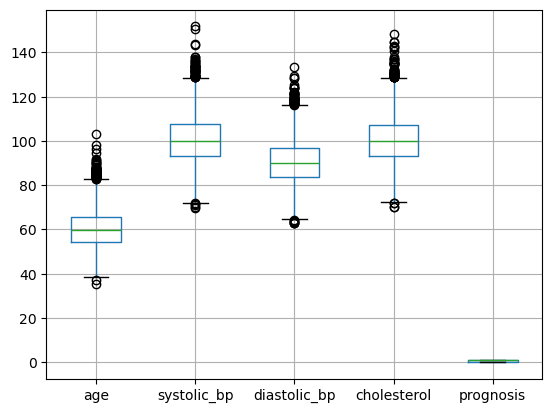

In [15]:
# Boxplot
df.boxplot()
# In all the features outliers are present

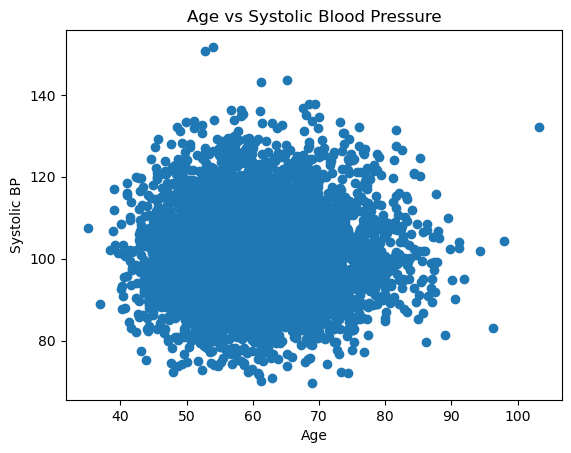

In [16]:
plt.scatter(df['age'], df['systolic_bp'])
plt.xlabel('Age')
plt.ylabel('Systolic BP')
plt.title('Age vs Systolic Blood Pressure')
plt.show()
# Weak relationship

In [17]:
sns.heatmap(df.corr(), annot=True) # Correlation

<Axes: >

In [18]:
sns.pairplot(df)#strong relationship between systolic_bp, diastolic_bp and cholestrol in predicting the Prognosis.

In [19]:
df.hist()
plt.tight_layout()

In [20]:
df.boxplot()# Outliers are present

<Axes: >

# **Outlier Capping**

In [21]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = remove_outliers(df, df.columns)

In [22]:
col= df.columns[:-1]  # exclude last column
df= remove_outliers(df, col)

In [23]:
df.boxplot()# By visualizing the boxplot we can see most of outliers are treated

<Axes: >

In [24]:
df['prognosis']

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prognosis, Length: 5777, dtype: int64

# **Hypothesis Testing**
2-Sample T-Test

The P value for all the numerical features is 0.00000 so, the p value is less than alpha i.e.,0.05 means all the features are statistically significant.

In [25]:
from scipy.stats import ttest_ind

numerical_cols = ['age', 'systolic_bp', 'diastolic_bp', 'cholesterol']

for col in numerical_cols:
    group0 = df[df['prognosis']==0][col]
    group1 = df[df['prognosis']==1][col]

    stat, p = ttest_ind(group0, group1)
    print(f"{col} → p-value = {p:.4f}")

age → p-value = 0.0000
systolic_bp → p-value = 0.0000
diastolic_bp → p-value = 0.0000
cholesterol → p-value = 0.0000


# ......**MODEL BUILDING**......

# **Split data in X and Y**

In [26]:
X=df.iloc[:,0:4]
Y=df['prognosis']

In [27]:
X

,age,systolic_bp,diastolic_bp,cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770
...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986
5996,63.099686,100.039527,93.515186,104.971404
5997,55.562243,98.421446,102.697875,120.875951
5998,63.468956,106.809289,88.060631,106.052213


In [28]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prognosis, Length: 5777, dtype: int64

In [29]:
type(X)

pandas.core.frame.DataFrame

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [31]:
X # -3 to 3

array([[ 2.08902038, -1.47612207, -1.10231778, -2.04373309],
       [ 0.40970699, -0.0901318 , -0.57535452,  1.02112277],
       [ 1.08235888,  1.08720991,  2.15173543,  0.05869556],
       ...,
       [-0.56933815, -0.18438918,  1.3714343 ,  2.0781768 ],
       [ 0.40222445,  0.64063912, -0.22536042,  0.58492555],
       [ 0.28399945, -0.33396156, -0.35437142,  0.84413604]])

# **Split entire data in train data and test data**

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=0)

In [33]:
x_train

array([[ 0.70075419,  0.61744613, -0.53656444,  0.25125569],
       [-0.18786734,  0.07060012,  2.18440211,  0.97266118],
       [ 0.80097729, -0.88902049,  0.16370963,  0.98067419],
       ...,
       [-0.95073421,  0.34120756, -1.54642989, -0.04846929],
       [-0.06444864,  1.10278029,  0.88578257,  2.37996359],
       [ 1.19686366,  0.73646617,  2.33071349,  0.26107052]])

In [34]:
x_test

array([[-0.83599098,  0.94044391,  0.66757564,  0.17204653],
       [ 1.16774948, -0.78651859, -0.62861193, -0.42970085],
       [ 2.16840788,  0.88374363,  0.47193271, -0.39953697],
       ...,
       [-0.81301203,  0.50621996, -0.25041557,  0.74896071],
       [ 0.46218226, -0.45404133,  0.96176599,  1.65139978],
       [ 1.19439923,  0.38817508, -0.54026451, -0.65046786]])

In [35]:
y_train

1637    1
2704    1
5063    1
2473    0
2873    0
       ..
5117    0
3385    0
1723    0
2711    1
2836    1
Name: prognosis, Length: 4621, dtype: int64

In [36]:
y_test

5795    1
3350    1
5315    1
2790    0
2752    1
       ..
2195    1
1480    0
938     1
3809    1
4418    1
Name: prognosis, Length: 1156, dtype: int64

# 1. **Logistic Regression Model**

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred = classifier.predict(x_test)

In [39]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [40]:
# Confusion Matrix for the model accuracy  TP   FP
#                                          FN   TN
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[446, 144],
       [148, 418]])

In [41]:
((446+418)/(446+418+144+148))*100 #Accuracy

74.74048442906575

In [42]:
from sklearn.metrics import roc_curve #roc-receiver operating characteristic
from sklearn.metrics import roc_auc_score # auc-area under curve
auc = roc_auc_score(y_test, y_pred)

In [43]:
auc

np.float64(0.7472240522249505)

# 2. **Decision Tree Classifier**

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [45]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=2, random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [46]:
fn=['age','systolic_bp','diastolic_bp','cholestrol'] # Feature names
cn=['1', '0'] # Class names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [47]:
 # getting the count of each category#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts()

1    624
0    532
Name: count, dtype: int64

In [48]:
model.feature_importances_

array([0.48437504, 0.12149934, 0.        , 0.39412561])

In [49]:
df.columns

Index(['age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [50]:
preds

array([0, 1, 1, ..., 1, 1, 1])

In [51]:
# Accuracy
np.mean(preds==y_test)

np.float64(0.7214532871972318)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       590
           1       0.70      0.77      0.73       566

    accuracy                           0.72      1156
   macro avg       0.72      0.72      0.72      1156
weighted avg       0.72      0.72      0.72      1156



### Building Decision Tree Classifier (CART) using Gini Criteria

In [53]:
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=0)

In [54]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [55]:
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

np.float64(0.7422145328719724)

# **Hyper parameter tuning**

In [56]:
# param_grid = {
#     'max_depth': [None, 2, 3],
#     'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'min_samples_leaf': [1, 2, 3, 4, 5],
#     'criterion': ['gini', 'entropy']
# }

In [57]:
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}

In [58]:
from sklearn.model_selection import train_test_split,GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,               # 5-fold cross-validation
                           scoring='accuracy', # metric to optimize
                           n_jobs=-1)

In [59]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='accuracy')

In [60]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [61]:
grid_search.best_score_

np.float64(0.7178067158067158)

In [62]:
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds) #Test Accuracy

0.7214532871972318

# 3. **Random Forest algorithm**

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [65]:
kfold=KFold(n_splits=10)

In [66]:
model1=RandomForestClassifier(n_estimators=100,max_features=4)

In [67]:
results=cross_val_score(model1,X,Y,cv=kfold)

In [68]:
results

array([0.70069204, 0.71453287, 0.73183391, 0.7283737 , 0.71453287,
       0.73356401, 0.71280277, 0.70710572, 0.73136915, 0.73310225])

In [69]:
results.mean()

np.float64(0.7207909302981056)

In [70]:
model1.fit(x_train,y_train)

RandomForestClassifier(max_features=4)

In [71]:
y_pred=model1.predict(x_test)

In [72]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [73]:
from sklearn.metrics import accuracy_score

y_train_pred = model1.predict(x_train)
y_test_pred = model1.predict(x_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

1.0
0.7301038062283737


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       590
           1       0.73      0.72      0.72       566

    accuracy                           0.73      1156
   macro avg       0.73      0.73      0.73      1156
weighted avg       0.73      0.73      0.73      1156



# **4. XGBM**

In [75]:
# User defined function to chk training and testing acccuracy of each model
def prediction(models):
  models.fit(x_train,y_train)
  ypred = models.predict(x_test)
  print('Train Accuracy: ',models.score(x_train,y_train))
  print('Test Accuracy: ',models.score(x_test,y_test))

In [76]:
prediction(LogisticRegression())

Train Accuracy:  0.737286301666306
Test Accuracy:  0.7474048442906575


In [77]:
prediction(model_gini)

Train Accuracy:  0.7236528889850682
Test Accuracy:  0.7422145328719724


In [78]:
prediction(RandomForestClassifier())

Train Accuracy:  1.0
Test Accuracy:  0.7292387543252595


In [79]:
# prediction(GradientBoostingClassifier())

In [80]:
params = {
    'n_estimators' : [90,120], # randomly select no. of trees/models
    'learning_rate' : [0.05,0.1,0.2], # alpha between 0 to 1
    'max_depth' : [2, 3]

}

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(GradientBoostingClassifier(),param_grid=params,verbose=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [2, 3],
                         'n_estimators': [90, 120]},
             verbose=1)

In [82]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 90}

In [83]:
prediction(GradientBoostingClassifier(learning_rate=0.05,max_depth=3,n_estimators=90))

Train Accuracy:  0.7574118156243237
Test Accuracy:  0.75


In [84]:
df['prognosis'].unique()

array([1, 0])

# **SVM**

In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [86]:
clf = SVC(kernel='rbf',gamma=0.01)
clf.fit(x_train,y_train)

SVC(gamma=0.01)

In [87]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred_clf=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred_clf)*100
print("Accuracy= ",acc)
cm=confusion_matrix(y_test,y_pred_clf)
print(cm)

Accuracy=  75.25951557093425
[[446 144]
 [142 424]]


In [88]:
prediction(clf)

Train Accuracy:  0.7420471759359446
Test Accuracy:  0.7525951557093425


In [89]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

In [90]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.5,1,0.001,0.0001],'C':[1,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=kfold)
gsv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 0.1], 'gamma': [0.5, 1, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [91]:
gsv.best_params_ , gsv.best_score_

({'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}, np.float64(0.7370672164408665))

In [92]:
clf = SVC(C=1,gamma=0.001,kernel='rbf') # can change kernel and check accuracy
clf.fit(x_train , y_train) #build model
y_pred = clf.predict(x_test)#predict on test dataset

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 75.0


array([[449, 141],
       [148, 418]])

In [93]:
prediction(SVC(C=1,gamma=0.001,kernel='rbf'))

Train Accuracy:  0.7381519151698767
Test Accuracy:  0.75


In [94]:
import pickle

In [95]:
with open("clf.pkl",'wb') as file:
    pickle.dump(clf,file)

In [96]:
pickle.dump(clf, open("clf.pkl", "wb"))
pickle.dump(sc, open("sc.pkl", "wb"))

In [97]:
# Save scaler
with open("sc.pkl", "wb") as f:
    pickle.dump(sc, f)

# Save model
with open("clf.pkl", "wb") as f:
    pickle.dump(clf, f)